# CNN Tutorial with PyTorch on the MNIST Dataset

In this tutorial, we will build a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. We'll go through the following steps:

1. **Data Loading, Processing, and Augmentation**
2. **Data Exploration**
3. **Model Building**
4. **Model Training**
5. **Model Evaluation**



## 1. Data Loading, Processing, and Augmentation

The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0-9). We'll use PyTorch's `torchvision` to load and preprocess the data. We will also apply some augmentations to improve our model's robustness.

### Exercise

1. Import the necessary libraries.
2. Load the MNIST dataset using `torchvision.datasets`.
3. Apply normalization to the dataset.
4. Create data loaders for training and testing with appropriate batch sizes.
5. Experiment with different data augmentations like rotation, translation, and flipping.

In [4]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.0,), (1.0,)),
                                # transforms.Resize((28,28)),
                                ])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

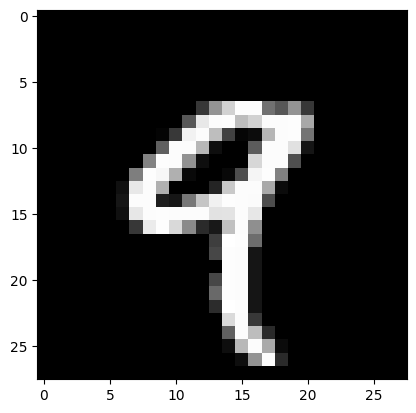

In [2]:
# plot image
import matplotlib.pyplot as plt

plt.imshow(train_dataset[4][0].numpy().squeeze(), cmap='gray')

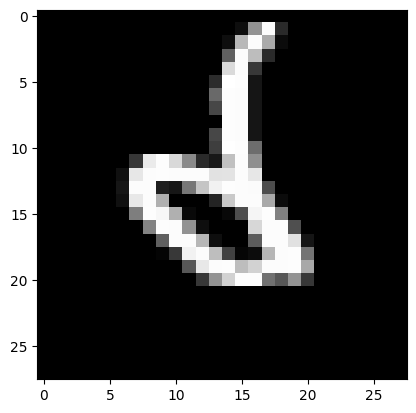

In [3]:
augmentation_transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=1.0),
])

transformed_augmentation_image = augmentation_transform(train_dataset[4][0])

plt.imshow(transformed_augmentation_image.numpy().squeeze(), cmap='gray')

## 2. Data Exploration

Before training our model, it's essential to explore the data. This helps us understand its distribution and visualize some examples.

### Exercise
1. Visualize a few images from the training dataset along with their labels.
2. Print the number of samples in the training and test datasets.

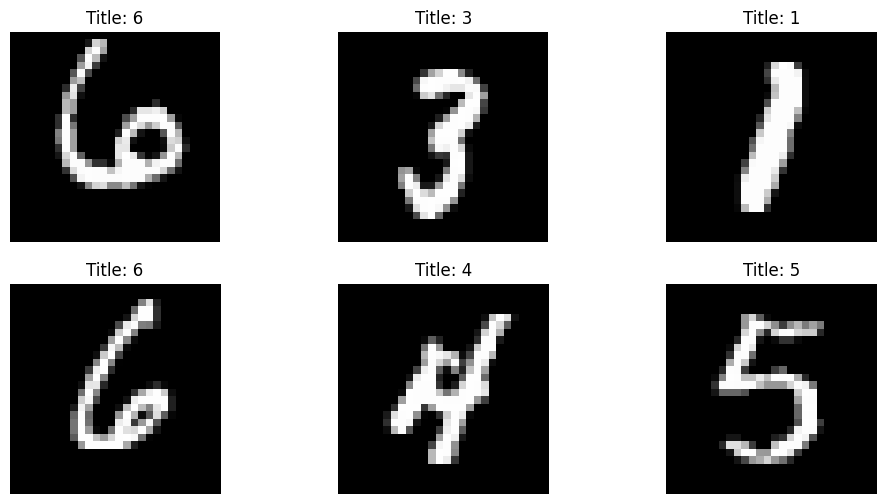

In [4]:
def show_images(images, labels): 
    plt.figure(figsize=(12,6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Title: {labels[i]}")
        plt.axis('off')
    plt.show()

data = iter(train_loader)
images, labels = next(data)
show_images(images, labels)

## 3. Model Building

Now, we'll define our CNN architecture. A typical CNN consists of convolutional layers, activation functions, pooling layers, and a fully connected output layer.

### Exercise
1. Define a CNN class inheriting from torch.nn.Module.
2. Include two convolutional layers, ReLU activations, max pooling, and a fully connected layer.

In [5]:
from torch import nn

class CNNModel(nn.Module):
    def __init__(self, kernel_size, stride, padding):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=kernel_size, stride=stride, padding=padding)
        # in_channels -> tem a ver com rgb, como estamos a usar imagens preto e branco, usa 1, se fosse rgb era 3 (r, g ,b). Channels de entrada
        # out_chanels -> quantos filtros
        # kernel_size -> tamanho do(s) filtros
        # stride -> quanto o(s) filtro(s) se desloca(m)
        # paddin -> tamnho da borda do(s) filtro(s)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU()
        self.avgpool = nn.AvgPool2d(kernel_size=kernel_size, stride=stride)
        self.fc1 = nn.Linear(kernel_size*kernel_size*20, 110)
        self.fc2 = nn.Linear(110, 10)
        self.dropout = nn.Dropout(p=0.2)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.avgpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return  self.softmax(x)

model = CNNModel(kernel_size=3, stride=1, padding=1)
print(model)

CNNModel(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (avgpool): AvgPool2d(kernel_size=3, stride=1, padding=0)
  (fc1): Linear(in_features=180, out_features=110, bias=True)
  (fc2): Linear(in_features=110, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (softmax): LogSoftmax(dim=1)
)


## 4. Model Training

We'll now define the training loop to optimize our model using the cross-entropy loss function and the Adam optimizer.

### Exercise
1. Define a function to train the model for a specified number of epochs.
2. Print the training loss after each epoch.

In [6]:
# ..

## 5. Model Evaluation

After training, we need to evaluate our model on the test dataset to understand its performance.

### Exercise
1. Define a function to evaluate the model's accuracy on the test set.
2. Print the accuracy.

In [7]:
# ..